# HRF Mark 2.4

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hrf = cv2.imread('/Users/teguhsatya/Dev/segeralulus/samples/s_hrf.jpg')

In [3]:
hrf_rgb = cv2.cvtColor(hrf, cv2.COLOR_BGR2RGB)
hrf_res = cv2.resize(hrf_rgb, (int(hrf_rgb.shape[1]*50/100), int(hrf_rgb.shape[0]*50/100)), cv2.INTER_AREA)
wlim = 135
hrfg = cv2.cvtColor(hrf_res, cv2.COLOR_RGB2GRAY)
xmax = cv2.minMaxLoc(hrfg)[3][0]
ymax = cv2.minMaxLoc(hrfg)[3][1]
roi = hrf_res.copy()[ymax-wlim:ymax+wlim,xmax-wlim:xmax+wlim]

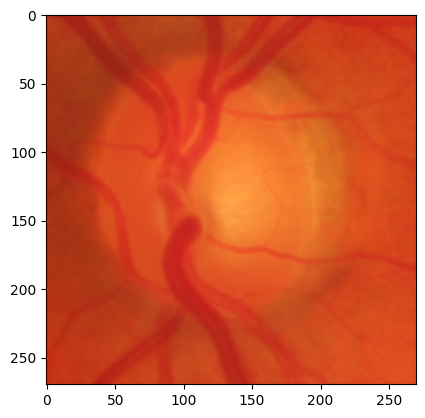

In [4]:
plt.imshow(roi)

In [5]:
def adjust_gamma(image, gamma=1.0):
    table = np.array([((i / 255.0) ** gamma) * 255
      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)

In [6]:
green = roi[:,:,1].copy()

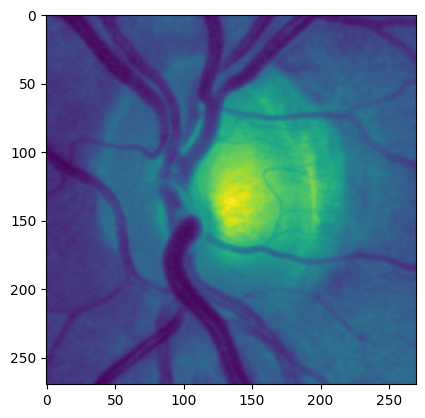

In [7]:
plt.imshow(green)

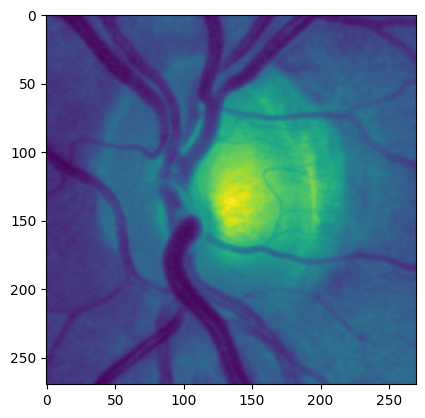

In [12]:
plt.imshow(roi[:,:,1])

In [13]:
green_inv = 255-green.copy()

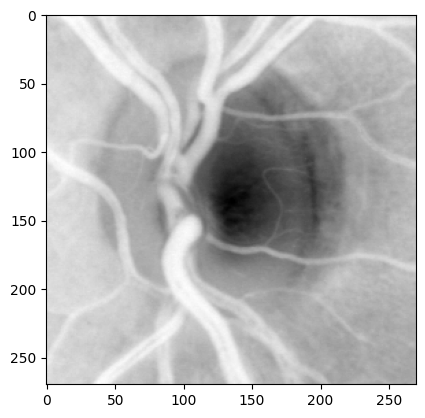

In [14]:
plt.imshow(green_inv, 'gray')

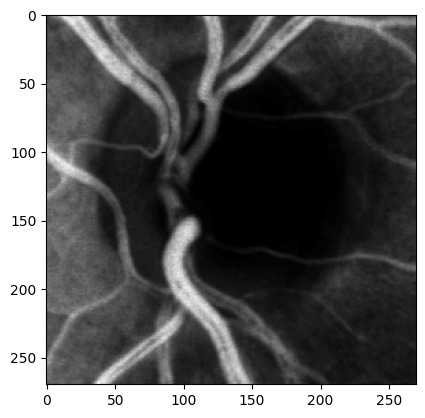

In [16]:
gmc = adjust_gamma(green_inv, 10.0)
plt.imshow(gmc, 'gray')

In [19]:
clahe = cv2.createCLAHE(2, (8,8))
gmclahe = clahe.apply(gmc.copy())

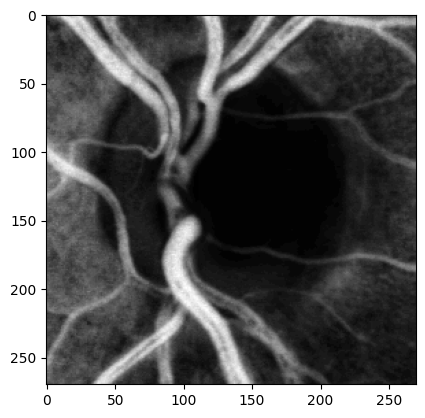

In [20]:
plt.imshow(gmclahe, 'gray')

In [21]:
ret, th = cv2.threshold(gmclahe.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

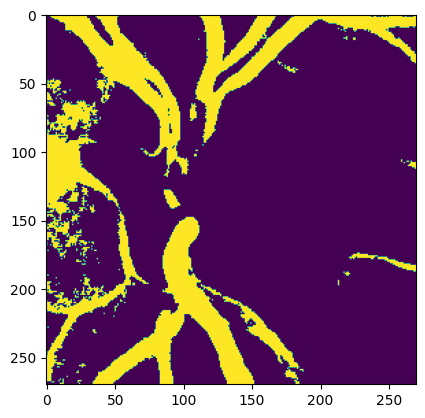

In [22]:
plt.imshow(th)

In [29]:
dst = cv2.inpaint(roi.copy(), th, 20,cv2.INPAINT_TELEA)

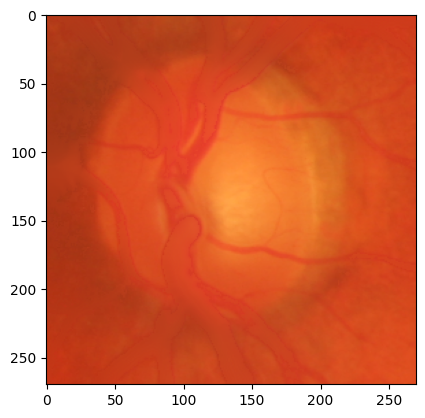

In [30]:
plt.imshow(dst)

In [46]:
dstr = dst[:,:,0].copy()

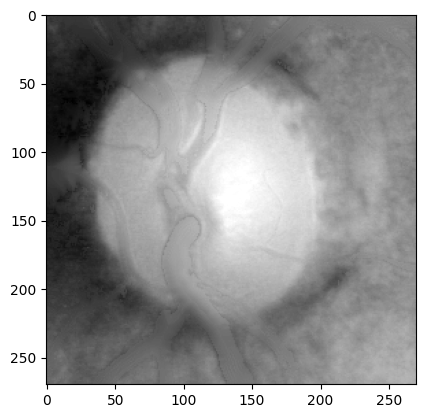

In [47]:
plt.imshow(dstr, 'gray')

In [48]:
dstg = dst[:,:,1].copy()

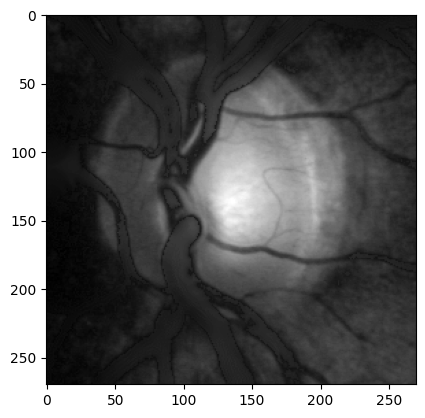

In [49]:
plt.imshow(dstg, 'gray')

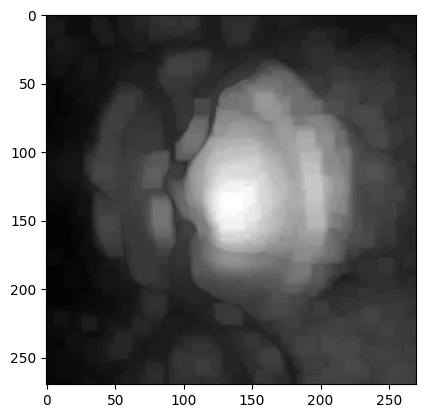

In [67]:
dilation = cv2.dilate(dstg.copy(), kernel=np.ones((10, 10), np.uint8))
plt.imshow(dilation, 'gray')

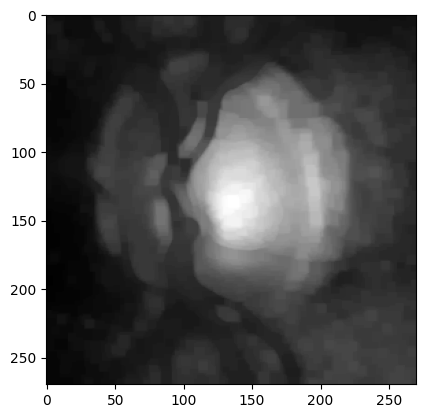

In [69]:
erosion = cv2.erode(dilation.copy(), kernel=np.ones((5, 5), np.uint8))
plt.imshow(erosion, 'gray')

In [70]:
ret2, th2 = cv2.threshold(erosion.copy(),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

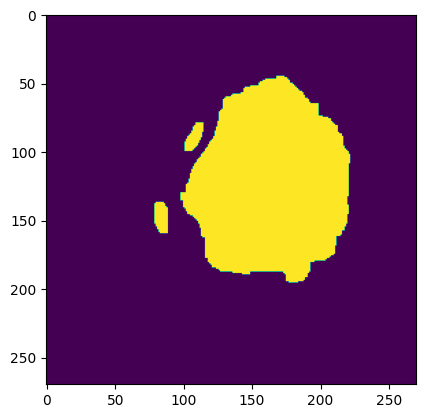

In [71]:
plt.imshow(th2)